# DeFi Lending and Borrowing Data

## Import Libraries

In [44]:
#imports
import requests
from dotenv import load_dotenv
import os
import pandas as pd
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [2]:
load_dotenv()

True

## Request Data by API

In [3]:
#set api keys for defi pulse
defi_api = os.getenv("defi_pulse_api")

In [4]:
#set urls data sources
defi_url_1 = f"https://data-api.defipulse.com/api/v1/defipulse/api/LendingMarketData?api-key={defi_api}"
defi_url_2 = f"https://data-api.defipulse.com/api/v1/defipulse/api/GetRates?token=DAI&amount=10000?api-key={defi_api}"
defi_url_3 = f"https://data-api.defipulse.com/api/v1/defipulse/api/getLendingHistory?api-key={defi_api}"

In [5]:
#response data
response_lending_market = requests.get(defi_url_1)
response_interest_rate = requests.get(defi_url_2)
response_lending_history = requests.get(defi_url_3)

In [6]:
#get API data as JSON file
lending_market_data = response_lending_market.json()
interest_rate_data_DAI = response_interest_rate.json()
lending_history_data = response_lending_history.json()

### Creating a DataFrame 

In [7]:
#loop Data for lending market
tokens = lending_market_data.keys()
total_interest_speed = []
total_supply = []
interest_dominance_name = []
interest_dominance_value = []
interest_dominance_pct = []
supply_dominance_name = []
supply_dominance_value = []
supply_dominance_pct = []

for each_token in tokens:
    total_interest_speed.append(lending_market_data[each_token]['total_interest_speed'])
    total_supply.append(lending_market_data[each_token]['total_supply'])
    interest_dominance_name.append(lending_market_data[each_token]['interest_speed']['dominance_name'])
    interest_dominance_value.append(lending_market_data[each_token]['interest_speed']['dominance_value'])
    interest_dominance_pct.append(lending_market_data[each_token]['interest_speed']['dominance_pct'])
    supply_dominance_name.append(lending_market_data[each_token]['supply']['dominance_name'])
    supply_dominance_value.append(lending_market_data[each_token]['supply']['dominance_value'])
    supply_dominance_pct.append(lending_market_data[each_token]['supply']['dominance_pct'])

In [8]:
#create dataframe for lending market
lending_market_df = pd.DataFrame({ 'Tokens': tokens,
                                'Interest Speed Dominance Name': interest_dominance_name,
                                'Interest Speed Dominance Value': interest_dominance_value,
                                'Interest Speed Dominance Percent' : interest_dominance_pct,
                                'Supply Dominance Name': supply_dominance_name,
                                'Supply Dominance Value' : supply_dominance_value,
                                'Supply Dominance Percent': supply_dominance_pct,
                                'Total Interest Speed': total_interest_speed,
                                'Total Supply': total_supply
                                 })
#set Index as Tokens
lending_market_df = lending_market_df.set_index('Tokens')
#drop row, "total" as it was uneccesary
lending_market_df.drop('total', inplace=True)

#clean numbers given by data
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#look at df head
lending_market_df.head()

,Interest Speed Dominance Name,Interest Speed Dominance Value,Interest Speed Dominance Percent,Supply Dominance Name,Supply Dominance Value,Supply Dominance Percent,Total Interest Speed,Total Supply
Tokens,,,,,,,,
DAI,maker,126837546.08016,46.19380,maker,4891468406.76226,56.52398,274576981.19889,8653792626.68684
BAT,compound,819170.76548,97.32045,compound,12617471.87229,95.22497,841725.22241,13250171.21583
COMP,compound,0.00237,97.94678,compound,0.04001,99.26317,0.00242,0.04030
LINK,compound,495089.61610,94.85758,compound,10430124.83627,57.18856,521929.42319,18238130.74836
REP,compound,4625.81094,99.97761,compound,33960.30499,98.59986,4626.84697,34442.54942


### Create visual plots with data 

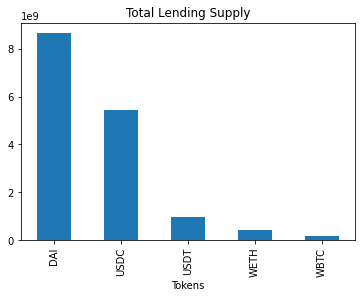

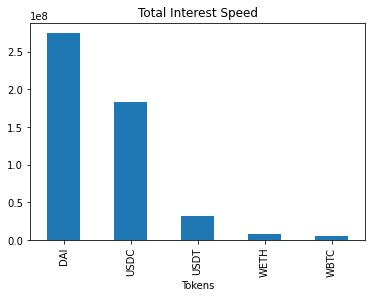

In [9]:
#total supply is amount of supply you have to borrow from
# total interest speed  = interest accumulated from total supply
lending_market_df.sort_values('Total Supply', ascending=False).head(5)['Total Supply'].plot(kind="bar", title = 'Total Lending Supply')
plt.show()
lending_market_df.sort_values('Total Interest Speed', ascending=False).head(5)['Total Interest Speed'].plot(kind="bar", title ='Total Interest Speed')
plt.show()

<AxesSubplot:title={'center':' DAI Borrow Interest Rates'}, xlabel='Platform'>

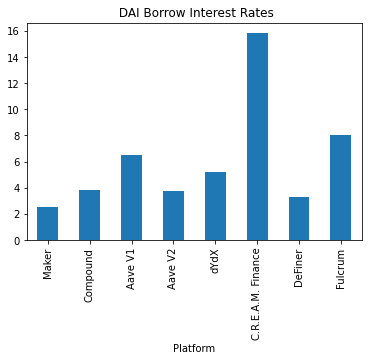

In [10]:
#create list for Data Frame
defi_lenders = interest_rate_data_DAI['rates'].keys()
lend_rate = []
lend_monthlyAmount= []
borrow_rate = []
borrow_monthlyAmount = []
term = []
name = []

#loop for list
for lender in defi_lenders:
    lend_rate.append(interest_rate_data_DAI['rates'][lender]['lend']['rate'])
    lend_monthlyAmount.append(interest_rate_data_DAI['rates'][lender]['lend']['monthlyAmount'])
    borrow_rate.append(interest_rate_data_DAI['rates'][lender]['borrow']['rate'])
    borrow_monthlyAmount.append(interest_rate_data_DAI['rates'][lender]['borrow']['monthlyAmount'])
    term.append(interest_rate_data_DAI['rates'][lender]['term'])
    name.append(interest_rate_data_DAI['rates'][lender]['name'])


#creating DF
DAI_interest_rates_df = pd.DataFrame({'Borrow Rate' : borrow_rate,
                                      'Borrow Monthly Amount': borrow_monthlyAmount,
                                      'Lend Rate': lend_rate,
                                      'Lend Monthly Amount': lend_monthlyAmount,
                                      'Term': term,
                                      'Platform': name
                                     })

#set index as Platform
DAI_interest_rates_df.set_index('Platform', inplace=True)

#look at head of DF

#turn Borrow Rate and Lend Rate from object to afloat
DAI_interest_rates_df['Borrow Rate'] = pd.to_numeric(DAI_interest_rates_df['Borrow Rate'],errors = 'coerce')
DAI_interest_rates_df['Lend Rate'] = pd.to_numeric(DAI_interest_rates_df['Lend Rate'],errors = 'coerce')

DAI_interest_rates_df['Borrow Rate'].plot(kind='bar', title = " DAI Borrow Interest Rates")

<AxesSubplot:title={'center':'DAI Lend Interest Rates'}, xlabel='Platform'>

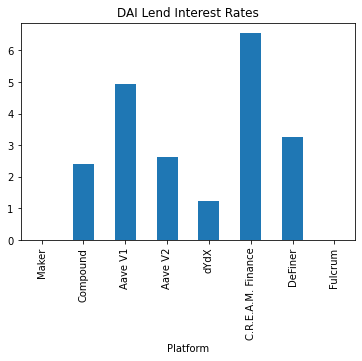

In [11]:
DAI_interest_rates_df['Lend Rate'].plot(kind='bar', title = "DAI Lend Interest Rates")

<AxesSubplot:title={'center':'DEFI Platforms Interest Rates'}, xlabel='Platform'>

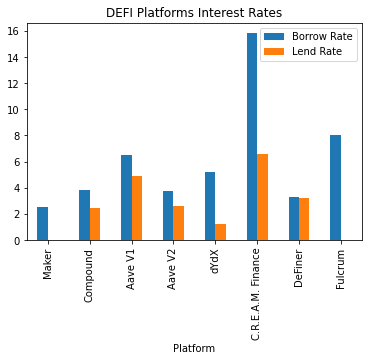

In [12]:
DAI_interest_rates_df[['Borrow Rate', 'Lend Rate']].plot(kind='bar', title = 'DEFI Platforms Interest Rates')

In [13]:
DAI_interest_rates_df.drop(columns=['Borrow Monthly Amount', 'Lend Monthly Amount', 'Term'], inplace =True)

In [14]:
DAI_interest_rates_df

,Borrow Rate,Lend Rate
Platform,,
Maker,2.54989,0.01001
Compound,3.81665,2.41371
Aave V1,6.49198,4.93198
Aave V2,3.76298,2.62258
dYdX,5.20524,1.24041
C.R.E.A.M. Finance,15.83281,6.55102
DeFiner,3.25318,3.25201
Fulcrum,8.00000,0.01000


<AxesSubplot:title={'center':'DAI Lend Borrow Rates'}, xlabel='Platform'>

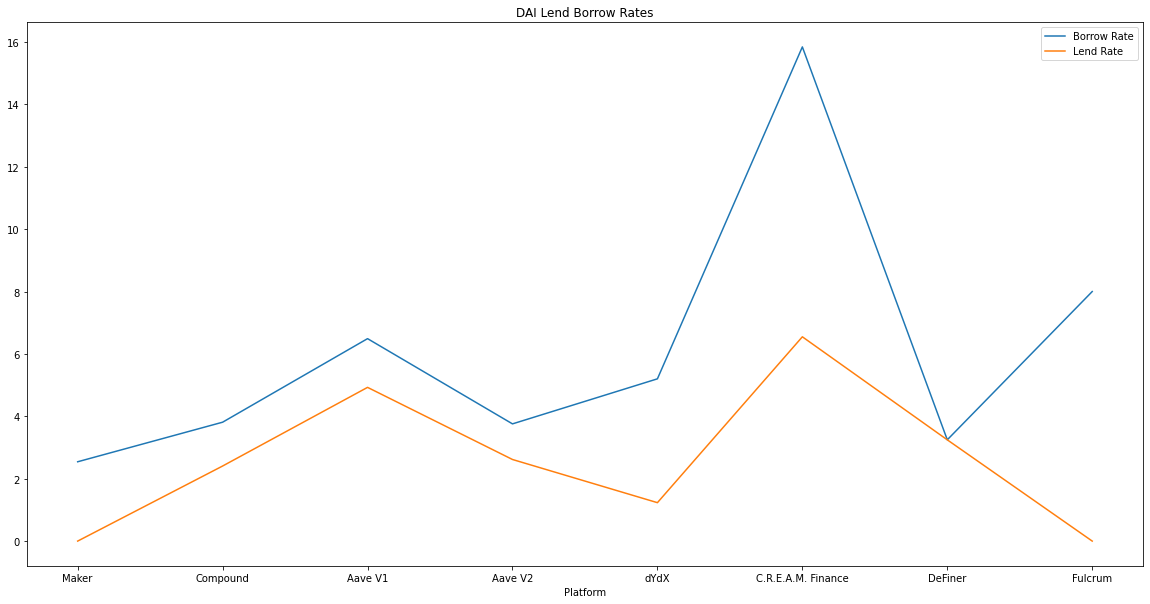

In [15]:
DAI_interest_rates_df.plot(figsize = (20,10), title ='DAI Lend Borrow Rates')

In [16]:
#DAI_interest_rates_df.hvplot(figsize = (20,10), title ='DAI Lend Borrow Rates')

In [17]:
#lending history

#fix timestap to date time
line1_date = pd.to_datetime(lending_history_data[0]['timestamp'], unit= 's')

#get all the timestamps from data given
timestamp_history = []
cnt = 0 


for t in lending_history_data:
    timestamp_history.append(pd.to_datetime(t['timestamp'], unit= 's'))
    cnt = cnt +1
    if cnt > 1200:
        break

In [20]:
time_list=[]
usd=[]
dai= []
cnt = 0
link = []
comp = []
aave = []


for each_time in lending_history_data: 
    cnt = cnt +1
    if cnt > 1260:
        break
    time_list.append(pd.to_datetime(each_time['timestamp'], unit = 's'))
    usd.append(each_time['interest_speed']['total']['USD']) #change total with desired token
    if 'DAI' in each_time['interest_speed']:
        dai.append(each_time['interest_speed']['DAI']['USD'])
    else:
        dai.append(0)
    if 'LINK' in each_time['interest_speed']:
        link.append(each_time['interest_speed']['LINK']['USD'])
    else:
        link.append(0)
    if 'COMP' in each_time['interest_speed']:
        comp.append(each_time['interest_speed']['COMP']['USD'])
    else:
        comp.append(0)
    if 'AAVE' in each_time['interest_speed']:
        aave.append(each_time['interest_speed']['AAVE']['USD'])
    else:
        aave.append(0)
        
#plt.plot(time_list, usd)
#plt.plot(time_list, dai)

In [21]:
#reverse data from then to now 
dai.reverse()
usd.reverse()
time_list.reverse()
link.reverse()
comp.reverse()
aave.reverse()

In [22]:
#lending history Dataframe
lending_history_df = pd.DataFrame({'DATE': time_list,
                                  'DAI': dai,
                                  'USD':usd,
                                  'LINK': link,
                                   'COMP': comp,
                                   'AAVE': aave
                                  })

In [23]:

lending_history_df.set_index('DATE', inplace=True)

In [24]:
lending_history_df.tail()

,DAI,USD,LINK,COMP,AAVE
DATE,,,,,
2021-06-04 00:00:00,266625977.33130,490907679.80381,599537.10622,0.00431,93277.21090
2021-06-05 00:00:00,265292294.47065,503060517.40909,557962.76487,0.00411,87904.05649
2021-06-06 00:00:00,263444026.79729,492884052.17410,477649.32924,0.00403,81207.31596
2021-06-07 00:00:00,263666787.58763,494302612.03530,599773.62052,0.00266,83833.33365
2021-06-08 16:00:00,274576981.19889,520805789.49159,521929.42319,0.00242,77002.13250


In [25]:
# lending_history_data

In [26]:
total_usd = []
time_stamp=[]
cnt= 1
time_list2 = []
lending_history_data[0]['interest_speed']['total']['USD']


for total in lending_history_data:
    cnt = cnt +1
    if cnt > 1260:
        break
    time_list2.append(pd.to_datetime(total['timestamp'], unit = 's'))
    total_usd.append(total['interest_speed']['total']['USD'])
    time_stamp.append(total['timestamp'])

<AxesSubplot:title={'center':'USD Total Interest Speed Over Time'}, xlabel='timestamp'>

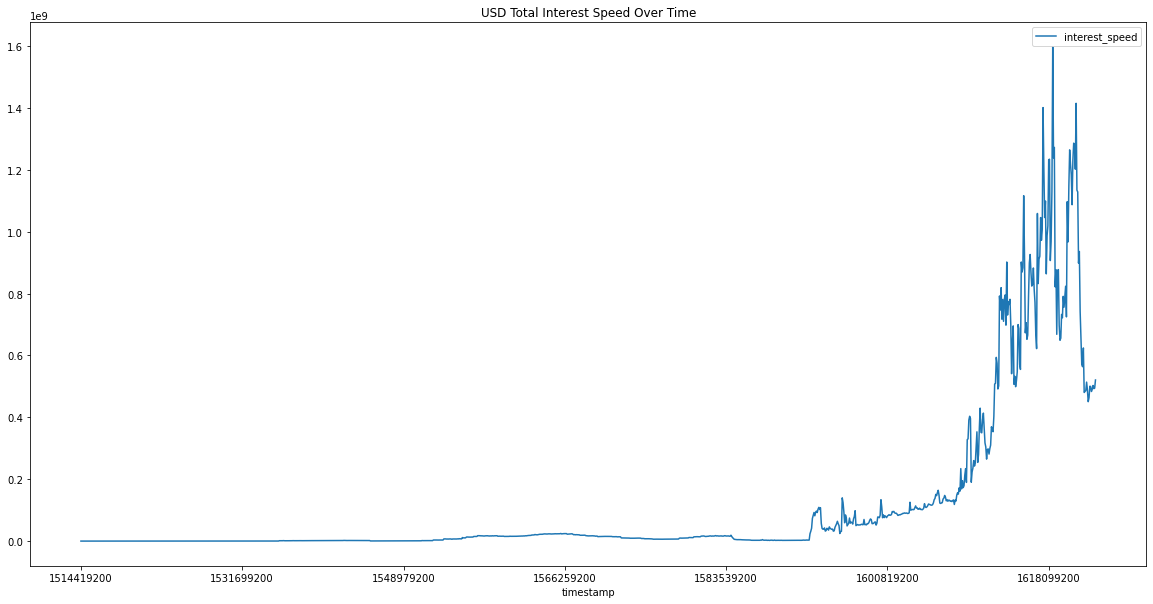

In [27]:
lending_history=pd.DataFrame({'timestamp':time_stamp, 
                              'interest_speed': total_usd
                             })
lending_history.sort_values('timestamp', ascending=True).set_index('timestamp').plot(figsize = (20,10),title = 'USD Total Interest Speed Over Time')

In [28]:
len(time_stamp)

1259

In [33]:
time_stamp.reverse()
total_usd.reverse()

In [30]:
len(time_list2)

1259

## This graph has timestamp converted to datetime

<AxesSubplot:title={'center':'USD Total Interest Speed Over Time'}, xlabel='timestamp'>

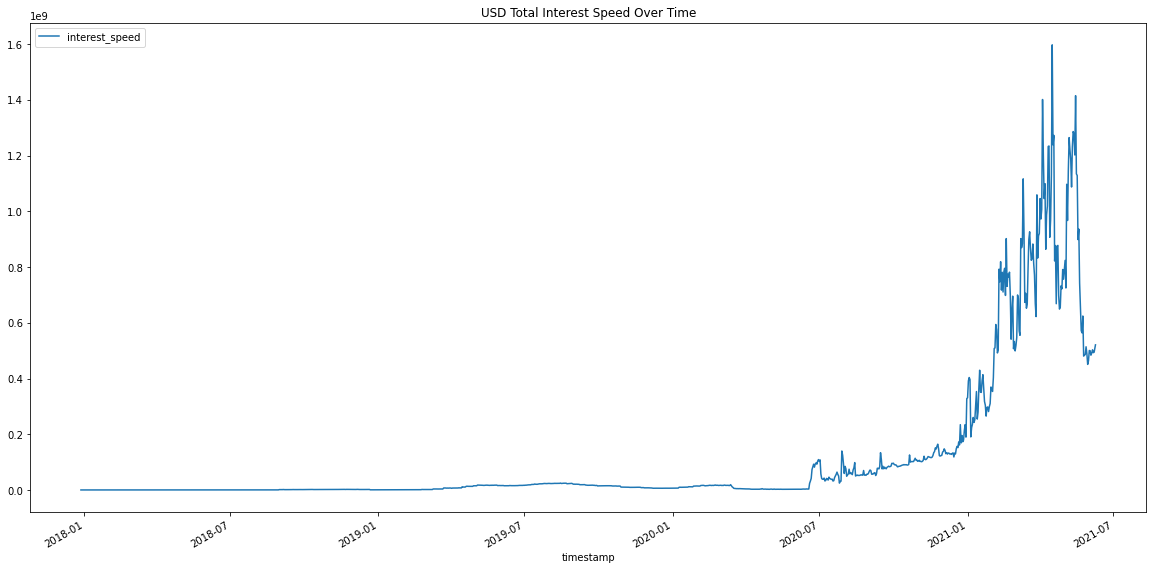

In [38]:


lending_history1=pd.DataFrame({'timestamp':time_list2, 
                              'interest_speed': total_usd
                             })
lending_history1.sort_values('timestamp', ascending=True).set_index('timestamp').plot(figsize = (20,10),title = 'USD Total Interest Speed Over Time')

In [32]:
lending_history1

,timestamp,interest_speed
0,2021-06-08 16:00:00,28858.62222
1,2021-06-07 00:00:00,28744.61254
2,2021-06-06 00:00:00,28480.01802
3,2021-06-05 00:00:00,28267.43709
4,2021-06-04 00:00:00,29651.87544
...,...,...
1254,2018-01-01 00:00:00,490907679.80381
1255,2017-12-31 00:00:00,503060517.40909
1256,2017-12-30 00:00:00,492884052.17410
1257,2017-12-29 00:00:00,494302612.03530


In [45]:
#fig, ax = plt.subplots()
#ax.plot(time_list2,total_usd)
#ax.ticklabel_format(useOffset=False)
#ax.ticklabel_format(style='plain',axis=‘y’)
#plt.show()
